In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Downloading files

In [2]:
!curl -O "https://raw.githubusercontent.com/SaminRK/scPSS-reproducibility/refs/heads/master/data_downloaders/download_calcagno.sh"
!curl -O "https://raw.githubusercontent.com/SaminRK/scPSS-reproducibility/refs/heads/master/preprocessors/preprocess_calcagno.py"
!curl -O "https://raw.githubusercontent.com/SaminRK/scPSS-reproducibility/refs/heads/master/utils/mean_margin.py"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1445  100  1445    0     0   7672      0 --:--:-- --:--:-- --:--:--  7645
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5339  100  5339    0     0  29359      0 --:--:-- --:--:-- --:--:-- 29497
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   987  100   987    0     0   5241      0 --:--:-- --:--:-- --:--:--  5250


In [3]:
!chmod +x download_calcagno.sh

In [4]:
!./download_calcagno.sh data

==> Downloading Zenodo ZIP...
--2025-07-23 05:37:04--  https://zenodo.org/records/7055957/files/Nikatag/Single-Cell-Spatial-Transcriptomics-for-Border-zone-BZ_Cell_Mapping.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.45.92, 188.185.48.194, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7972177 (7.6M) [application/octet-stream]
Saving to: ‘/content/data/Single-Cell-Spatial-Transcriptomics-for-Border-zone-BZ_Cell_Mapping_zenodo.zip’

/content/data/Singl 100%[===================>]   7.60M  34.5MB/s    in 0.2s    

2025-07-23 05:37:05 (34.5 MB/s) - ‘/content/data/Single-Cell-Spatial-Transcriptomics-for-Border-zone-BZ_Cell_Mapping_zenodo.zip’ saved [7972177/7972177]

==> Unzipping Zenodo ZIP...
Archive:  /content/data/Single-Cell-Spatial-Transcriptomics-for-Border-zone-BZ_Cell_Mapping_zenodo.zip
8f7e1d14be5fa874c92bff1d8cb282eb9aa613fd
   creating: /content/data/Nikatag-Single-Ce

## scPSS

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
!pip install git+https://github.com/SaminRK/scPSS.git

  Cloning https://github.com/SaminRK/scPSS.git to /tmp/pip-req-build-ci1tb_eu
  Running command git clone --filter=blob:none --quiet https://github.com/SaminRK/scPSS.git /tmp/pip-req-build-ci1tb_eu
  Resolved https://github.com/SaminRK/scPSS.git to commit c16c71713e6a618ed6196b83b1dc3daa30838e1a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of umap-learn to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 156.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.7 MB/s eta 0:00:00
  Created wheel for scPSS: f

In [7]:
DATA_DIR = 'data'

In [8]:
OUTPUT_PATH = '/content/drive/MyDrive/Research - Sohel sir/Pathological Cells/Pathological Cell Identification/outputs'
FIGURE_PATH = f'{OUTPUT_PATH}/figures'
PROBLEM_KEY = 'ref_0_que_1-7'

In [9]:
import scanpy as sc
import pandas as pd

In [10]:
from preprocess_calcagno import get_preprocessed_anndata

ad = get_preprocessed_anndata(PROBLEM_KEY, DATA_DIR)

In [11]:
sc.tl.pca(ad)

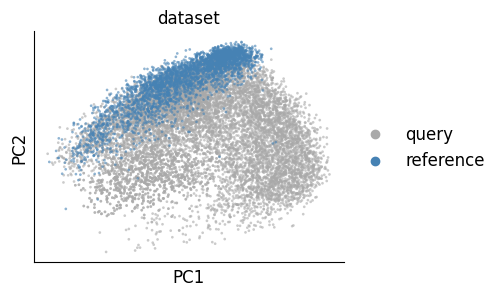

In [12]:
import matplotlib.pyplot as plt
import scanpy as sc

# Define custom colors for 'datagroup' categories
custom_palette = [ "#A9A9A9", "#4682B4",]  # SteelBlue and DarkGray

# Map the colors to 'datagroup' categories
ad.uns['dataset_colors'] = custom_palette

# Reorder 'ad' by 'datagroup' first by 'reference', then by 'query'
ad = ad[ad.obs['dataset'].argsort(kind='mergesort')]  # Reorder AnnData object

# Set global font size for ticks and labels
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Generate PCA plot with custom palette
sc.pl.pca(ad, color='dataset', show=False, s=15, alpha=0.6)

# Get the current axis and remove the border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('reference_query_pca.svg')
plt.show()
plt.close()

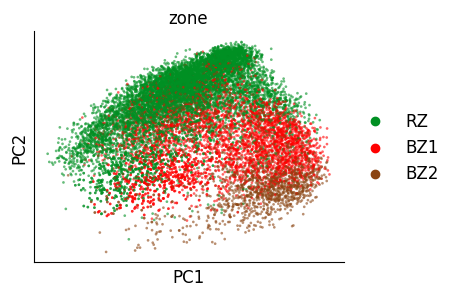

In [13]:
import matplotlib.pyplot as plt
import scanpy as sc

# Define custom colors for 'final_cluster' categories
custom_palette = [ "#009023", "#FF0000", "#8B4513"]  # LightGreen, BrightRed, SaddleBrown

# Map the colors to 'final_cluster' categories
ad.uns['zone_colors'] = custom_palette

# Set global font size for ticks and labels
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

zone_order = ["RZ", "BZ1", "BZ2"]

ad.obs['zone'] = pd.Categorical(
    ad.obs['zone'],
    categories=zone_order,
    ordered=True
)

# Generate PCA plot with the blue-green-red palette
sc.pl.pca(ad, color='zone', show=False, s=15, alpha=0.6)

# Get the current axis and remove the border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('zone_pca.svg')
plt.show()
plt.close()

## Find optimal number of PCs

In [14]:
reference_samples = list(ad.obs[ad.obs['dataset'] == 'reference']['sample'].unique())
query_samples = list(ad.obs[ad.obs['dataset'] == 'query']['sample'].unique())

In [15]:
%%time
from scpss import scPSS

scpss = scPSS(ad, 'sample', reference_samples, query_samples)
scpss.harmony_integrate()
params = scpss.find_optimal_parameters()
scpss.set_distance_and_condition()

2025-07-23 05:45:37,901 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...


✅ PCA Complete.


2025-07-23 05:45:41,376 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2025-07-23 05:45:41,430 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2025-07-23 05:45:44,326 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2025-07-23 05:45:47,270 - harmonypy - INFO - Converged after 2 iterations
INFO:harmonypy:Converged after 2 iterations


✅ Harmony Integration Complete.
✅ Found Optimal Parameters.
✅ Stored distances and conditions in Anndata object.
CPU times: user 1min 39s, sys: 1.48 s, total: 1min 40s
Wall time: 36 s


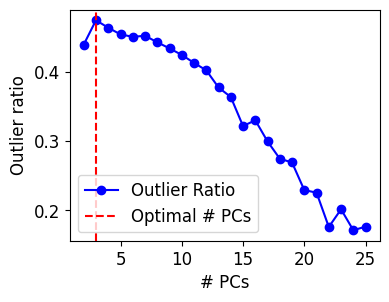

In [16]:
x_values = []
y_values = []
optimal_params = None
best_outlier_ratio = 0
for param in params:
    if (param['outlier_ratio'] > best_outlier_ratio):
        best_outlier_ratio = param['outlier_ratio']
        optimal_params = param
    x_values.append(param['n_comps'])
    y_values.append(param['outlier_ratio'])
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='Outlier Ratio')
plt.legend()
plt.xlabel('# PCs')
plt.ylabel('Outlier ratio')
plt.axvline(optimal_params['n_comps'], color='r', linestyle='--', label='Optimal # PCs')
plt.legend()

plt.savefig('outlier-ratios-ncomps.svg')
plt.show()

In [17]:
ks = scpss.best_params['ks']
outlier_ratios_for_k = scpss.best_params['outlier_ratios_for_k']
optimal_k = scpss.best_params['optimal_k']

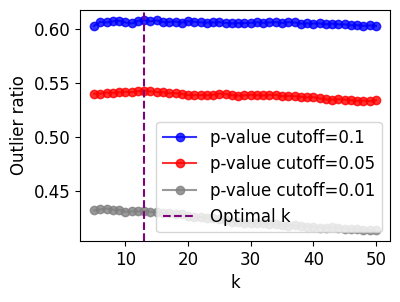

In [18]:
x_values, y_values = ks, outlier_ratios_for_k[:, 0]
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', alpha=.8, label='p-value cutoff=0.1')

x_values, y_values = ks, outlier_ratios_for_k[:, 1]
plt.plot(x_values, y_values, marker='o', linestyle='-', color='r', alpha=.8, label='p-value cutoff=0.05')

x_values, y_values = ks, outlier_ratios_for_k[:, 2]
plt.plot(x_values, y_values, marker='o', linestyle='-', color='grey', alpha=.8, label='p-value cutoff=0.01')

plt.axvline(optimal_k, color='purple', linestyle='--', label='Optimal k')
plt.xlabel('k')
plt.ylabel('Outlier ratio')
plt.legend(loc='lower right')

plt.savefig('outlier-ratios-k.svg')
plt.show()

In [19]:
ps = scpss.best_params['ps']
outlier_ratios_for_p = scpss.best_params['outlier_ratios_for_p']
optimal_p = scpss.best_params['optimal_p']

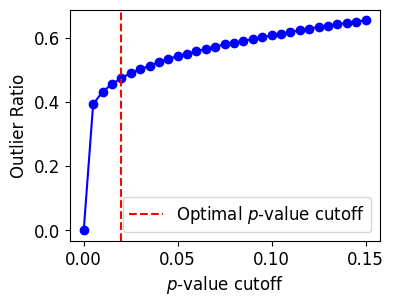

In [20]:
plt.plot(ps, outlier_ratios_for_p, marker='o', linestyle='-', color='b')
plt.axvline(optimal_p, color='r', linestyle='--', label='Optimal $p$-value cutoff')
plt.legend()

plt.xlabel('$p$-value cutoff')
plt.ylabel('Outlier Ratio')

plt.savefig('outlier-ratios-p-val.svg')
plt.show()

In [21]:
dist_ref_ref = scpss.adata.obs.loc[scpss.reference_mask, 'scpss_scores']
dist_que_ref = scpss.adata.obs.loc[scpss.query_mask, 'scpss_scores']
thres = scpss.best_params['threshold']

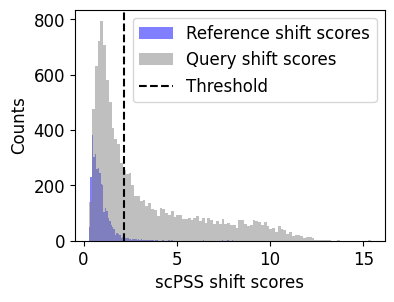

In [22]:
import matplotlib.pyplot as plt

plt.hist(dist_ref_ref, bins=100, alpha=.5, color='blue', label='Reference shift scores')
plt.hist(dist_que_ref, bins=100, alpha=.5, color='gray', label='Query shift scores')
plt.axvline(thres, color='black', linestyle='--', label='Threshold')
plt.legend()
plt.xlabel('scPSS shift scores')
plt.ylabel('Counts')
plt.savefig('distance-distributions-ref-que.svg')
plt.show()

In [23]:
import numpy as np

In [24]:
dist_que_healthy = dist_que_ref[scpss.adata.obs['zone'].isin(['RZ'])]
dist_que_disease = dist_que_ref[scpss.adata.obs['zone'].isin(['BZ1', 'BZ2'])]

print(np.mean(dist_que_healthy < thres), np.mean(dist_que_disease > thres))

0.8275461040039874 0.8075513196480938


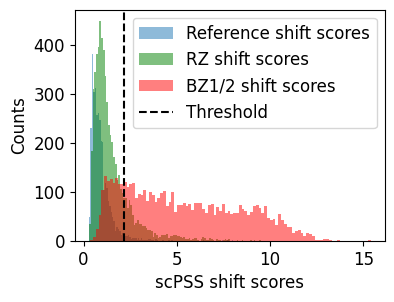

In [25]:
plt.hist(dist_ref_ref, bins=100, alpha=.5, label='Reference shift scores')
plt.hist(dist_que_healthy, bins=100, alpha=.5, color='green', label='RZ shift scores')
plt.hist(dist_que_disease, bins=100, alpha=.5, color='red', label='BZ1/2 shift scores')
plt.axvline(thres, color='black', linestyle='--', label='Threshold')
plt.xlabel('scPSS shift scores')
plt.ylabel('Counts')

plt.legend()

plt.savefig('distance-distributions-ref-healthy-diseased.svg')
plt.show()

In [26]:
dist_que_bz1 = dist_que_ref[scpss.adata.obs['zone'].isin(['BZ1'])]
dist_que_bz2 = dist_que_ref[scpss.adata.obs['zone'].isin(['BZ2'])]

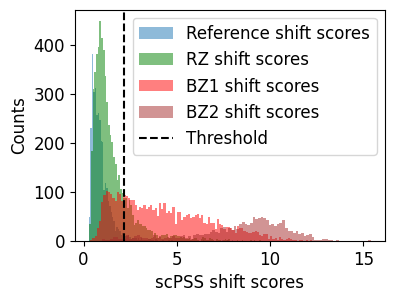

In [27]:
plt.hist(dist_ref_ref, bins=100, alpha=.5, label='Reference shift scores')
plt.hist(dist_que_healthy, bins=100, alpha=.5, color='green', label='RZ shift scores')
plt.hist(dist_que_bz1, bins=100, alpha=.5, color='red', label='BZ1 shift scores')
plt.hist(dist_que_bz2, bins=100, alpha=.5, color='brown', label='BZ2 shift scores')
plt.axvline(thres, color='black', linestyle='--', label='Threshold')
plt.xlabel('scPSS shift scores')
plt.ylabel('Counts')

plt.legend()

plt.savefig('distance-distributions-ref-rz-bz1-bz2.svg')
plt.show()

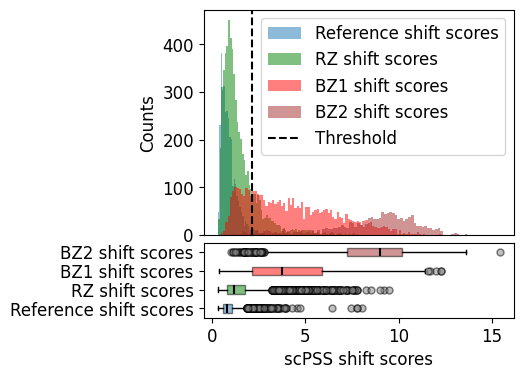

In [28]:
fig, axs = plt.subplots(2, 1, figsize=(4, 4), gridspec_kw={'height_ratios': [3, 1]})

# Plot histograms in the first subplot
axs[0].hist(dist_ref_ref, bins=100, alpha=0.5, label='Reference shift scores')
axs[0].hist(dist_que_healthy, bins=100, alpha=0.5, color='green', label='RZ shift scores')
axs[0].hist(dist_que_bz1, bins=100, alpha=0.5, color='red', label='BZ1 shift scores')
axs[0].hist(dist_que_bz2, bins=100, alpha=0.5, color='brown', label='BZ2 shift scores')
axs[0].axvline(thres, color='black', linestyle='--', label='Threshold')
axs[0].legend()
axs[0].set_ylabel('Counts')


# Remove x-ticks and x-tick labels from the first subplot
axs[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Plot boxplots in the second subplot
box = axs[1].boxplot(
    [dist_ref_ref, dist_que_healthy, dist_que_bz1, dist_que_bz2],
    vert=False,  # Horizontal boxplots
    labels=['Reference shift scores', 'RZ shift scores', 'BZ1 shift scores', 'BZ2 shift scores'],
    patch_artist=True,  # Allow face color
    flierprops=dict(marker='o', markersize=5, markerfacecolor='gray', alpha=0.5)
)
axs[1].set_xlabel('scPSS shift scores')

colors = ['C0', 'green', 'red', 'brown']  # C0 is the default for the first histogram

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)


# Set median lines to black
for median in box['medians']:
    median.set_color('black')
    median.set_linewidth(1.5)

# Reduce the gap between subplots
plt.subplots_adjust(hspace=0.05)  # Adjust the vertical spacing between the panels

# Save and show the figure
plt.savefig('distance-distributions-with-boxplots.svg')
plt.show()

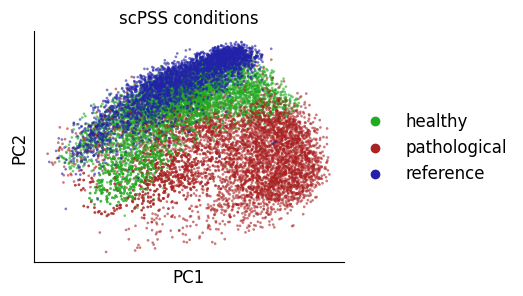

In [29]:
# Set global font size for ticks and labels
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Define custom colors for 'final_cluster' categories
custom_palette = [ "#22AA22", "#AA2222", "#2222AA", ]  # LightGreen, BrightRed, SaddleBrown

# Map the colors to 'final_cluster' categories
scpss.adata.uns['scpss_condition_colors'] = custom_palette


# Generate PCA plot with custom palette
sc.pl.pca(scpss.adata, color='scpss_condition', show=False, s=15, alpha=0.6)

# Get the current axis and remove the border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("scPSS conditions", fontsize=12)


plt.savefig('scpss_condition.svg')
plt.show()
plt.close()

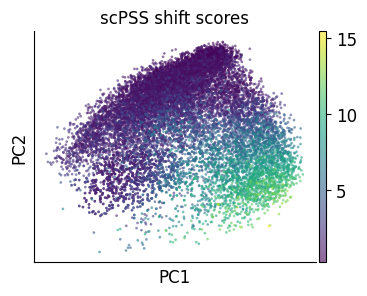

In [30]:
# Set global font size for ticks and labels
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12


# Generate PCA plot with custom palette
sc.pl.pca(scpss.adata, color='scpss_scores', show=False, s=15, alpha=0.6)

# Get the current axis and remove the border (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("scPSS shift scores", fontsize=12)

plt.savefig('scpss_distances.svg')
plt.show()
plt.close()

In [31]:
plt.rcParams['font.size'] = 14

In [32]:
ad_que = scpss.adata[scpss.query_mask]

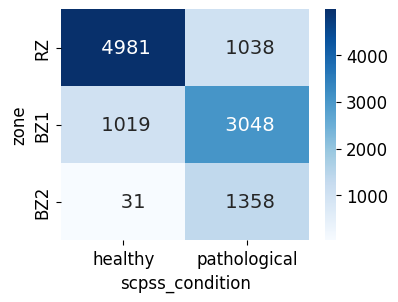

In [33]:
import seaborn as sns
cmtx = sc.metrics.confusion_matrix("zone", "scpss_condition", ad_que.obs, normalize=False)
sns.heatmap(cmtx, annot=True, fmt='5g', cmap='Blues')

plt.savefig("confusion_matrix.svg", format="svg")
plt.show()

In [34]:
true_labels = ad_que.obs['zone'].isin(['BZ1', 'BZ2']).to_numpy()
predicted_labels = ad_que.obs['scpss_condition'].isin([scpss._pathological_label]).to_numpy()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8180392156862745
Precision: 0.8093313739897134
Recall: 0.8075513196480938
F1-score: 0.808440366972477


AUC: 0.9030416998176352
AUPR: 0.9043315402688485


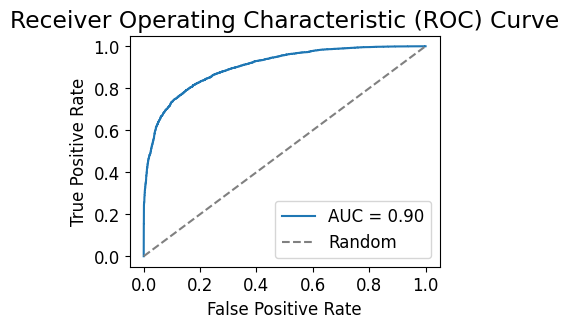

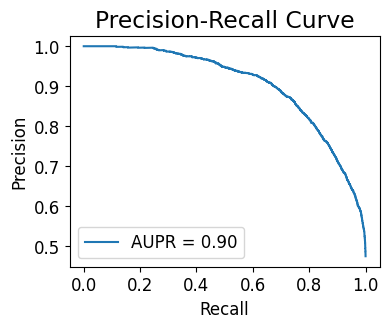

In [35]:
from sklearn.metrics import roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

y_true = true_labels
y_scores = dist_que_ref

# Calculate AUC
auc = roc_auc_score(y_true, y_scores)
print("AUC:", auc)

# Calculate AUPR
aupr = average_precision_score(y_true, y_scores)
print("AUPR:", aupr)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig('auroc.svg')
plt.show()

# Plot Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
plt.figure(figsize=(4, 3))
plt.plot(recall, precision, label=f'AUPR = {aupr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.savefig('aupr.svg')
plt.show()

## Finding differentially expressed genes

In [36]:
NUM_GENES = 30

In [37]:
sc.tl.rank_genes_groups(scpss.adata, groupby='scpss_condition', method='wilcoxon', groups=[scpss._pathological_label], reference=scpss._reference_label)

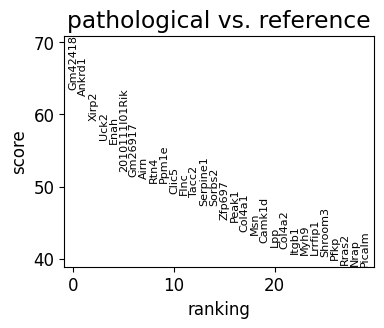

In [38]:
sc.pl.rank_genes_groups(scpss.adata, n_genes=NUM_GENES)

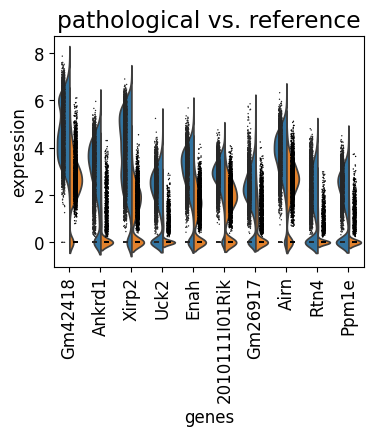

In [39]:
sc.pl.rank_genes_groups_violin(scpss.adata, n_genes=10)

categories: healthy, pathological, reference
var_group_labels: pathological


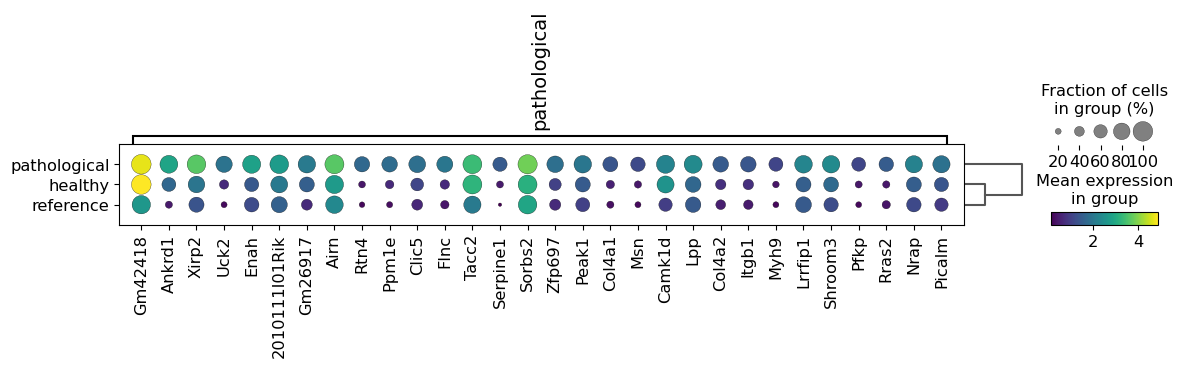

In [40]:
sc.pl.rank_genes_groups_dotplot(scpss.adata, n_genes=NUM_GENES, groupby='scpss_condition', cmap='viridis', save='.svg')

In [41]:
import pandas as pd
import numpy as np


rank_result = scpss.adata.uns['rank_genes_groups']
groups = rank_result['names'].dtype.names

top_genes = set()
for group in groups:
    genes = rank_result['names'][group][:NUM_GENES]
    top_genes.update(genes)

print(f"Total unique top genes: {len(top_genes)}")

Total unique top genes: 30


In [42]:
author_deg_df = pd.read_csv("/content/drive/MyDrive/Research - Sohel sir/Pathological Cells/Pathological Cell Identification/data/Infracted Heart Border Zone - GSE214611_RAW/44161_2022_160_MOESM2_ESM.csv")
author_deg_df

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene,Rank
0,0.000000e+00,3.398347,0.993,0.822,0.000000e+00,Xirp2,Xirp2,1
1,0.000000e+00,3.019829,0.944,0.460,0.000000e+00,Xirp2,Flnc,2
2,0.000000e+00,2.658143,0.914,0.402,0.000000e+00,Xirp2,Rtn4,3
3,0.000000e+00,2.570636,0.748,0.208,0.000000e+00,Xirp2,Lmcd1,4
4,0.000000e+00,2.418349,0.891,0.408,0.000000e+00,Xirp2,Rras2,5
5,0.000000e+00,2.314948,0.761,0.284,0.000000e+00,Xirp2,1110002E22Rik,6
6,0.000000e+00,2.189968,0.772,0.244,0.000000e+00,Xirp2,Cd44,7
7,0.000000e+00,2.130866,0.862,0.314,0.000000e+00,Xirp2,Serpine1,8
8,0.000000e+00,2.118901,0.611,0.182,0.000000e+00,Xirp2,Erc2,9
9,0.000000e+00,2.090519,0.590,0.119,0.000000e+00,Xirp2,Klhl41,10


In [43]:
author_degs = set(author_deg_df['gene'])

In [44]:
adata_genes = set(scpss.adata.var_names)
author_degs_in_adata = author_degs & adata_genes
len(author_degs_in_adata)

19

In [45]:
common = author_degs_in_adata & top_genes
len(common)

14

In [46]:
!pip install matplotlib-venn

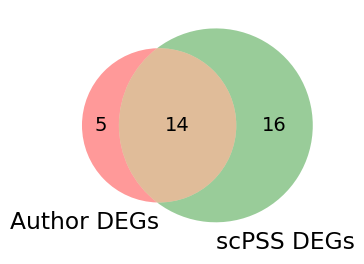

In [47]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 14
# Create Venn diagram
venn2([author_degs_in_adata, top_genes], set_labels=('Author DEGs', 'scPSS DEGs'))

# Optional formatting
# plt.title("Overlap of Author DEGs and DEGs from scPSS")
plt.savefig('venn.svg')
plt.show()


In [48]:
scpss.adata.obs["ground_truth"] = np.where(
    scpss.adata.obs["zone"].isin(["BZ1", "BZ2"]),
    "BZ1/2",
    "RZ"
)

In [49]:
sc.tl.rank_genes_groups(scpss.adata, groupby='ground_truth', method='wilcoxon', groups=['BZ1/2'], reference='RZ')

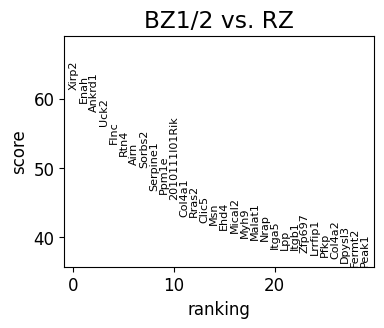

In [50]:
sc.pl.rank_genes_groups(scpss.adata, n_genes=NUM_GENES)

In [51]:
import pandas as pd
import numpy as np


rank_result = scpss.adata.uns['rank_genes_groups']
groups = rank_result['names'].dtype.names

top_genes_truth = set()
for group in groups:
    genes = rank_result['names'][group][:NUM_GENES]
    top_genes_truth.update(genes)

print(top_genes_truth)

{'Malat1', 'Pfkp', 'Airn', 'Uck2', 'Lpp', 'Rras2', 'Lrrfip1', 'Itgb1', 'Sorbs2', 'Zfp697', 'Xirp2', 'Nrap', 'Enah', 'Mical2', 'Clic5', 'Msn', 'Itga5', 'Dpysl3', 'Peak1', 'Ehd4', 'Col4a2', 'Fermt2', 'Ppm1e', 'Col4a1', '2010111I01Rik', 'Ankrd1', 'Myh9', 'Serpine1', 'Rtn4', 'Flnc'}


In [52]:
common = top_genes_truth & top_genes
len(common)

24

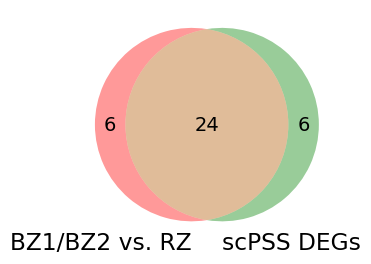

In [53]:
# Create Venn diagram
venn2([top_genes_truth, top_genes], set_labels=('BZ1/BZ2 vs. RZ', 'scPSS DEGs'))

# Optional formatting
# plt.title("Overlap of Author DEGs and DEGs from scPSS")
plt.savefig('venn2.svg')
plt.show()

In [54]:
columns_to_export = ["scpss_scores"]  # Replace with actual column names
df = scpss.adata.obs[columns_to_export]
df.to_csv("case-scpss.csv")